In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pysam
import pandas as pd
import numpy as np
import os
import collections
import ast
from pygenomeviz import GenomeViz

In [23]:
#pysam.faidx('/home/mark/Desktop/HLA/Globus/cleaned/NA18939.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta', 'NA18939.hap1:4416396-4419396')

# Import DataFrames

In [2]:
drbList = []
for file in os.listdir('/home/mark/Desktop/HLA/DRB/DataFrames/full/'):
    print(file)
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/DRB/DataFrames/full/'+str(file))
    for row in tempDF.index:
        drbList.append([x for x in tempDF.loc[row]])

NA20847.hap2.csv
HG00358.hap2.csv
HG02953.hap2.csv
HG02554.hap2.csv
HG01114.hap2.csv
HG02059.hap1.csv
HG00514.hap1.csv
HG01596.hap1.csv
NA18939.hap2.csv
NA19129.hap1.csv
NA19331.hap1.csv
HG03065.hap2.csv
NA19705.hap1.csv
HG03456.hap2.csv
HG00358.hap1.csv
NA19317.hap1.csv
HG03807.hap1.csv
NA19240.hap1.csv
HG03371.hap2.csv
HG01573.hap1.csv
HG02769.hap1.csv
NA18989.hap1.csv
HG00096.hap1.csv
HG01596.hap2.csv
HG00512.hap2.csv
HG04036.hap1.csv
NA20509.hap2.csv
NA12329.hap1.csv
HG02587.hap1.csv
NA18989.hap2.csv
NA19239.hap1.csv
HG03732.hap2.csv
hg38.hap6.csv
HG01114.hap1.csv
HG04217.hap1.csv
NA24385.hap1.csv
HG02769.hap2.csv
HG02011.hap1.csv
HG04217.hap2.csv
chm13.hap1.csv
NA19384.hap2.csv
HG03248.hap1.csv
NA19036.hap2.csv
HG00864.hap1.csv
HG03520.hap1.csv
NA19836.hap1.csv
HG03009.hap1.csv
HG00514.hap2.csv
HG02059.hap2.csv
NA19650.hap2.csv
NA20355.hap1.csv
NA20847.hap1.csv
HG01352.hap1.csv
HG02106.hap1.csv
HG02666.hap2.csv
HG02953.hap1.csv
HG03683.hap2.csv
NA19347.hap2.csv
NA18534.hap1.csv
HG

In [3]:
DRB_DF1 = pd.DataFrame(data=drbList)

In [4]:
DRB_DF1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NA20847.hap2_4318694_MIRb,42.0,33.3,6.1,0.0,NA20847.hap2,4318694,4318891,(1781957),+,MIRb,SINE/MIR,10,219.0,(49),7116.0,4318206,488,NaN,NaN
1,NA20847.hap2_4319056_AluSc,327.0,8.8,0.3,0.0,NA20847.hap2,4319056,4319352,(1781496),+,AluSc,SINE/Alu,1,298.0,(11),7117.0,4318206,850,NaN,NaN
2,NA20847.hap2_4319558_AluY,343.0,5.8,0.0,2.3,NA20847.hap2,4319558,4319870,(1780978),+,AluY,SINE/Alu,1,306.0,(5),7118.0,4318206,1352,NaN,NaN
3,NA20847.hap2_4319880_L1MC2,668.0,18.3,4.0,0.7,NA20847.hap2,4319880,4320719,(1780129),C,L1MC2,LINE/L1,(10),6334.0,5467,7119.0,4318206,1674,NaN,NaN
4,NA20847.hap2_4320739_L1MD2,439.0,21.0,11.8,2.7,NA20847.hap2,4320739,4321444,(1779404),C,L1MD2,LINE/L1,(15),6344.0,5577,7120.0,4318206,2533,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48516,NA12329.hap2_4585462_AluSg7,217.0,8.7,19.5,0.7,NA12329.hap2,4585462,4585702,(1533005),+,AluSg7,SINE/Alu,12,297.0,(12),7539.0,4309952,275510,NaN,NaN
48517,NA12329.hap2_4586217_MIR,43.0,32.0,1.0,0.0,NA12329.hap2,4586217,4586313,(1532394),+,MIR,SINE/MIR,58,155.0,(107),7540.0,4309952,276265,NaN,NaN
48518,NA12329.hap2_4586402_MER90a,69.0,21.1,2.3,0.0,NA12329.hap2,4586402,4586529,(1532178),C,MER90a,LTR/ERV1,(2),612.0,482,7541.0,4309952,276450,NaN,NaN
48519,NA12329.hap2_4586530_MLT2C1,225.0,23.4,4.5,6.1,NA12329.hap2,4586530,4586911,(1531796),C,MLT2C1,LTR/ERVL,(18),379.0,4,7542.0,4309952,276578,NaN,NaN


In [5]:
import ast
goodRows =[]
for row in DRB_DF1.index:
    if 'DRB' in str(DRB_DF1.at[row,18]):
        goodRows.append(row)
        DRB_DF1.at[row,11] = ast.literal_eval(DRB_DF1.at[row,18]).strip()
        if '+' in str(DRB_DF1.at[row,9]):
            DRB_DF1.at[row,10] = str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"->_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())
        else:
            DRB_DF1.at[row,10] = "<-"+str(ast.literal_eval(DRB_DF1.at[row,18]).strip())+"_"+str(ast.literal_eval(DRB_DF1.at[row,19]).strip())

    else:
        if DRB_DF1.at[row,2]<=50.0:
            goodRows.append(row)
        else:
            continue
DRB_DF2=DRB_DF1.loc[goodRows].copy()

In [6]:
pDF1 = pd.read_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM_ReWork2024-03-27-2024.csv').drop(columns=['Unnamed: 0'])
for row in pDF1.index:
    if pDF1.at[row,'8']=='HLA-DRB6-202_lncR_EXON_6':
        pDF1.at[row,'14']='Gene'
    else:
        continue
pDF  = pDF1[pDF1['14']=='Gene'].copy()

In [7]:
pDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,41136,0.0,0.0,0.0,HG00512.hap1,4281494,4281760,C,HLA-DRB9-201_UP_EXON_2,0,267,1,HLA-DRB9-201,0.996255,Gene,HLA-DRB9
1,41137,0.0,0.0,0.0,HG00512.hap1,4295101,4295176,C,HLA-DRB9-201_UP_EXON_1,0,76,1,HLA-DRB9-201,0.986842,Gene,HLA-DRB9
2,41457,0.0,0.0,0.0,HG02282.hap2,4392244,4392292,C,HLA-DRB2-201_UP_IN-25_EXON_4,0,49,1,HLA-DRB2-201,0.979592,Gene,HLA-DRB2
3,41458,0.0,0.0,0.0,HG02282.hap2,4392744,4392854,C,HLA-DRB2-201_UP_EXON_3,0,111,1,HLA-DRB2-201,0.990991,Gene,HLA-DRB2
4,41459,0.0,0.0,0.0,HG02282.hap2,4393604,4393865,C,HLA-DRB2-201_UP_EXON_2,0,262,1,HLA-DRB2-201,0.996183,Gene,HLA-DRB2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,42154,2.7,0.0,0.0,NA21487.hap1,4511747,4511857,C,HLA-DRB8-201_UP_EXON_2,0,111,1,HLA-DRB8-201,0.990991,Gene,HLA-DRB8
1136,42155,0.3,0.0,0.0,NA21487.hap1,4512556,4512837,C,HLA-DRB8-201_UP_EXON_1,0,282,1,HLA-DRB8-201,0.996454,Gene,HLA-DRB8
1137,42177,0.8,0.0,0.0,NA21487.hap1,4387319,4387585,C,HLA-DRB9-201_UP_EXON_2,0,267,1,HLA-DRB9-201,0.996255,Gene,HLA-DRB9
1138,42178,2.7,0.0,0.0,NA21487.hap1,4400902,4400976,C,HLA-DRB9-201_UP_EXON_1,1,75,1,HLA-DRB9-201,0.973684,Gene,HLA-DRB9


In [8]:
mydrbList=[]
for row in DRB_DF2.index:
    mydrbList.append([x for x in DRB_DF2.loc[row]])
    
for row in pDF.index:
    row0 = 'placeholder'
    row1 = 'placeholder1'
    row2 = pDF.at[row,'1']
    row3 = pDF.at[row,'2']
    row4 = pDF.at[row,'3']
    row5 = pDF.at[row,'4']
    row6 = pDF.at[row,'5']
    row7 = pDF.at[row,'6']
    row8 = 'placeholder'
    if pDF.at[row,'7'] =='C':
        row9='-'
        row10 = '<-HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])
    else:
        row9='+'
        row10 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])+'_'+str(pDF.at[row,'8'].split("_")[-1])+"->"
        
        
    row11 = 'HLA-'+str(pDF.at[row,'8'].split("-")[1])
    row12 = 'placeholder'
    row13 = 'placeholder'
    row14 = 'placeholder'
    row15 = 'placeholder'

    mydrbList.append([row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row14,row14,row14,row14])

In [9]:
DRB_DF = pd.DataFrame(data=mydrbList).sort_values(by=[6,5])
DRB_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
39654,hg38.hap8_3668839_MIRb,42.0,33.3,6.1,0.0,hg38.hap8,3668839,3669036,(937352),+,MIRb,SINE/MIR,10,219.0,(49),5719.0,3668351,488,NaN,NaN
39655,hg38.hap8_3669201_AluSc,327.0,8.8,0.3,0.0,hg38.hap8,3669201,3669497,(936891),+,AluSc,SINE/Alu,1,298.0,(11),5720.0,3668351,850,NaN,NaN
39656,hg38.hap8_3669703_AluY,344.0,5.7,0.0,2.3,hg38.hap8,3669703,3670016,(936372),+,AluY,SINE/Alu,1,307.0,(4),5721.0,3668351,1352,NaN,NaN
39657,hg38.hap8_3670019_L1MC2,669.0,18.2,4.0,1.6,hg38.hap8,3670019,3670871,(935517),C,L1MC2,LINE/L1,(5),6339.0,5467,5722.0,3668351,1668,NaN,NaN
39658,hg38.hap8_3670891_L1MD2,440.0,21.0,11.8,2.7,hg38.hap8,3670891,3671596,(934792),C,L1MD2,LINE/L1,(15),6344.0,5577,5723.0,3668351,2540,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,HG03248.hap2_4689492_AluSg7,217.0,8.7,19.5,0.7,HG03248.hap2,4689492,4689732,(1549881),+,AluSg7,SINE/Alu,12,297.0,(12),7697.0,4411787,277705,NaN,NaN
35325,HG03248.hap2_4690247_MIR,43.0,32.0,1.0,0.0,HG03248.hap2,4690247,4690343,(1549270),+,MIR,SINE/MIR,58,155.0,(107),7698.0,4411787,278460,NaN,NaN
35326,HG03248.hap2_4690432_MER90a,69.0,21.1,2.3,0.0,HG03248.hap2,4690432,4690559,(1549054),C,MER90a,LTR/ERV1,(2),612.0,482,7699.0,4411787,278645,NaN,NaN
35327,HG03248.hap2_4690560_MLT2C1,225.0,23.4,4.5,6.1,HG03248.hap2,4690560,4690941,(1548672),C,MLT2C1,LTR/ERVL,(18),379.0,4,7700.0,4411787,278773,NaN,NaN


In [31]:
countDict={}
for sample in set(DRB_DF[5]):
    if 'chm13' in sample or 'hg38' in sample:
        continue
    else:
        tempCountDF = DRB_DF[DRB_DF[5]==sample].copy()
        tempList = sorted([y for y in set([ast.literal_eval(x) for x in tempCountDF[18] if 'DRB' in str(x)])])
        if '_'.join(tempList) in countDict.keys():
            countDict['_'.join(tempList)]+=1
        else:
            countDict['_'.join(tempList)]=1

In [32]:
countDict

{'HLA-DRB1_HLA-DRB3': 58,
 'HLA-DRB1_HLA-DRB5': 18,
 'HLA-DRB1': 21,
 'HLA-DRB1_HLA-DRB4': 33}

In [20]:
set(tempCountDF[18])

{' "HLA-DRB1"', ' "HLA-DRB3"', nan, 'placeholder'}

In [28]:
tempList

['HLA-DRB1', 'HLA-DRB3']

In [79]:
set(DRB_DF[11])

{'DNA/TcMar-Mariner',
 'DNA/TcMar-Tigger',
 'DNA/hAT-Blackjack',
 'DNA/hAT-Charlie',
 'DNA/hAT-Tip100',
 'HLA-DRB1',
 'HLA-DRB2',
 'HLA-DRB3',
 'HLA-DRB4',
 'HLA-DRB5',
 'HLA-DRB6',
 'HLA-DRB7',
 'HLA-DRB8',
 'HLA-DRB9',
 'LINE/CR1',
 'LINE/L1',
 'LINE/L2',
 'LTR/ERV1',
 'LTR/ERVK',
 'LTR/ERVL',
 'LTR/ERVL-MaLR',
 'Low_complexity',
 'Retroposon/SVA',
 'SINE/Alu',
 'SINE/MIR',
 'Simple_repeat',
 'snRNA'}

In [80]:
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_50percent.csv")
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_20percent.csv")
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_10percent.csv")
#DRB_DF.to_csv("/home/mark/Desktop/HLA/DRB/DRB_wPseudo_5percent.csv")

# Start Visualization

In [10]:
ColorDict = {
 'HLA-DRB2':'cyan',
 'HLA-DRB6':'cyan',
 'HLA-DRB7':'cyan',
 'HLA-DRB8':'cyan',
 'HLA-DRB9':'cyan',  
 'HLA-DRB1':'Magenta',
 'HLA-DRB3':'Magenta',
 'HLA-DRB4':'Magenta',
 'HLA-DRB5':'Magenta',
 'DNA/TcMar-Mariner':'blue',
 'DNA/TcMar-Tigger':'blue',
 'DNA/hAT-Blackjack':'blue',
 'DNA/hAT-Charlie':'blue',
 'DNA/hAT-Tip100':'blue',
 'LINE/CR1':'darkgreen',
 'LINE/L2':'green',
 'LINE/L1':'lime',
 'LTR/ERVK':'orange',
 'LTR/ERV1':'orange',
 'LTR/ERVL':'orange',
 'LTR/ERVL-MaLR':'orange',
 'Low_complexity':'brown',
 'Retroposon/SVA':'yellow',
 'SINE/MIR':'darkred',
 'SINE/Alu':'red',
 'snRNA':'silver',
 'Simple_repeat':"brown",
 
}

In [11]:
DRB_DF['Color']=[ColorDict[x] for x in DRB_DF[11]]

In [12]:
DRB_DF['Insertion_Distance']='temp'

for sample in set([x for x in DRB_DF[5]]):
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)
    start = int(min(tempDF[6]))
    
    for row in tempDF.index:
        DRB_DF.at[row,'Insertion_Distance']= (int(tempDF.at[row,6])-start)+10

In [13]:
lengths=[]
for row in DRB_DF.index:
    lengths.append((int(DRB_DF.at[row,7]) - int(DRB_DF.at[row,6]))+1)
DRB_DF['Length']= lengths

In [14]:
#for haplotype in set(DRB_DF[5]):
#    tempDF = DRB_DF[DRB_DF[5]==haplotype].copy()
#    tempDF.to_csv('/home/mark/Desktop/HLA/DRB/DataFrames/percent_50/'+str(haplotype)+"_50_percent.csv")

In [15]:
genome_list = {}
for sample in set(DRB_DF[5]):
    
    tempDF = DRB_DF[DRB_DF[5]==sample].copy()
    tempDF[6]= tempDF[6].astype(int)
    tempDF[7]= tempDF[7].astype(int)

    size = abs(min(tempDF[6])-max(tempDF[7]))

    genome_list[sample]={'name':sample, 'size':size+20, 'cds_list':[]}
    
    for item in tempDF.index:
        start = int(tempDF.at[item,'Insertion_Distance'])
        end = int(tempDF.at[item,'Insertion_Distance'])+int(tempDF.at[item,'Length'])
        if tempDF.at[item,9] == '+':
            strand = 1
        else:
            strand = -1
        genome_list[sample]['cds_list'].append([start, end, strand, str(tempDF.at[item,10]), str(str(tempDF.at[item,'Color']))])

In [16]:
genome_list['HG01890.hap1']

{'name': 'HG01890.hap1',
 'size': 190186,
 'cds_list': [[10, 208, 1, 'MIRb', 'darkred'],
  [372, 670, 1, 'AluSc', 'red'],
  [876, 1190, 1, 'AluY', 'red'],
  [1199, 2039, -1, 'L1MC2', 'lime'],
  [2058, 2762, -1, 'L1MD2', 'lime'],
  [2764, 2865, 1, 'AluJr', 'red'],
  [2866, 3159, -1, 'AluSc', 'red'],
  [3159, 3343, 1, 'AluJr', 'red'],
  [3348, 3819, 1, 'GA-rich', 'brown'],
  [3820, 3895, -1, 'L1PREC2', 'lime'],
  [3897, 4206, -1, 'AluSx3', 'red'],
  [4206, 6301, -1, 'L1PREC2', 'lime'],
  [6301, 6655, 1, 'THE1B', 'orange'],
  [6656, 7247, 1, 'THE1B', 'orange'],
  [7249, 7540, -1, 'AluY', 'red'],
  [7540, 8518, 1, 'THE1B', 'orange'],
  [8518, 8875, 1, 'THE1B', 'orange'],
  [8888, 9461, 1, 'L1PA15', 'lime'],
  [9462, 9739, 1, 'AluSc', 'red'],
  [9743, 9889, 1, 'L1PA15', 'lime'],
  [9891, 10056, -1, 'AluSc8', 'red'],
  [10056, 10082, 1, '(T)n', 'brown'],
  [10082, 10200, -1, 'AluSc8', 'red'],
  [10200, 11337, 1, 'L1PA15', 'lime'],
  [11337, 11765, 1, 'MER83', 'orange'],
  [11765, 12370, 1, '

In [88]:
import json
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
my_sample_data = js_r('/home/mark/Desktop/HLA/Globus/sample_hap_HLA_Sequence_Dictionary.json')
sampleList = ['chm13.hap1','hg38.hap1','hg38.hap2','hg38.hap3','hg38.hap6','hg38.hap7','hg38.hap8']
for x in my_sample_data.keys():
    if 'unassigned' in x:
        continue
    else:
        sampleList.append(str(x.split(".")[0])+".hap"+str(x.split("hap")[1].split(".")[0]))
sampleList2 = sorted(sampleList)
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData.sort_values(by=['population'])
sampleList3 = ['chm13.hap1','hg38.hap1','hg38.hap2','hg38.hap3','hg38.hap6','hg38.hap7','hg38.hap8']
for x in metaData.sort_values(by=['population'])['sample']:
    if str(x)+".hap1" in sampleList2:
        sampleList3.append(str(x)+".hap1")
        sampleList3.append(str(x)+".hap2")
    else:
        continue

In [89]:
sampleList3

['chm13.hap1',
 'hg38.hap1',
 'hg38.hap2',
 'hg38.hap3',
 'hg38.hap6',
 'hg38.hap7',
 'hg38.hap8',
 'HG01890.hap1',
 'HG01890.hap2',
 'HG02554.hap1',
 'HG02554.hap2',
 'HG02011.hap1',
 'HG02011.hap2',
 'HG02282.hap1',
 'HG02282.hap2',
 'NA19705.hap1',
 'NA19705.hap2',
 'NA19983.hap1',
 'NA19983.hap2',
 'NA20355.hap1',
 'NA20355.hap2',
 'NA19836.hap1',
 'NA19836.hap2',
 'NA24385.hap1',
 'NA24385.hap2',
 'HG03009.hap1',
 'HG03009.hap2',
 'HG03807.hap1',
 'HG03807.hap2',
 'HG00864.hap1',
 'HG00864.hap2',
 'NA12329.hap1',
 'NA12329.hap2',
 'NA18534.hap1',
 'NA18534.hap2',
 'HG00514.hap1',
 'HG00514.hap2',
 'HG00513.hap1',
 'HG00513.hap2',
 'HG00512.hap1',
 'HG00512.hap2',
 'HG01352.hap1',
 'HG01352.hap2',
 'HG01457.hap1',
 'HG01457.hap2',
 'HG01114.hap1',
 'HG01114.hap2',
 'HG03520.hap1',
 'HG03520.hap2',
 'HG03371.hap1',
 'HG03371.hap2',
 'HG02953.hap1',
 'HG02953.hap2',
 'HG00268.hap1',
 'HG00268.hap2',
 'HG00358.hap1',
 'HG00358.hap2',
 'HG00171.hap1',
 'HG00171.hap2',
 'HG00096.hap1',


In [90]:
#I removed these because NNNNNNNNs where in this region
sampleList3.remove('NA18939.hap1')
sampleList3.remove('NA18939.hap2')

In [91]:
print(len(sampleList3))

135


In [92]:
ColorDict

{'HLA-DRB2': 'cyan',
 'HLA-DRB6': 'cyan',
 'HLA-DRB7': 'cyan',
 'HLA-DRB8': 'cyan',
 'HLA-DRB9': 'cyan',
 'HLA-DRB1': 'Magenta',
 'HLA-DRB3': 'Magenta',
 'HLA-DRB4': 'Magenta',
 'HLA-DRB5': 'Magenta',
 'DNA/TcMar-Mariner': 'blue',
 'DNA/TcMar-Tigger': 'blue',
 'DNA/hAT-Blackjack': 'blue',
 'DNA/hAT-Charlie': 'blue',
 'DNA/hAT-Tip100': 'blue',
 'LINE/CR1': 'darkgreen',
 'LINE/L2': 'green',
 'LINE/L1': 'lime',
 'LTR/ERVK': 'orange',
 'LTR/ERV1': 'orange',
 'LTR/ERVL': 'orange',
 'LTR/ERVL-MaLR': 'orange',
 'Low_complexity': 'brown',
 'Retroposon/SVA': 'yellow',
 'SINE/MIR': 'darkred',
 'SINE/Alu': 'red',
 'snRNA': 'silver',
 'Simple_repeat': 'brown'}

In [94]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

gv = GenomeViz(tick_style="axis")

for genome in sampleList3:
    name, size, cds_list = genome_list[genome]["name"], genome_list[genome]["size"], genome_list[genome]["cds_list"]
    track = gv.add_feature_track(name, size)
    
    flag=1
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand, mylabel, color  = cds
        
        if 'HLA' in str(mylabel) and '_1' in str(mylabel):
            track.add_feature(start, end, strand, label='←\n'+str(mylabel.split("HLA-")[1].split("_")[0]),facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="left", labelha="left")
        else:
            track.add_feature(start, end, strand, facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="center", labelha="center")
                
# Add Legends 
handles =[]
for color in ColorDict.keys():
    if 'HLA' in str(color):
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=str(color)+"-Exon", ms=10, ls="none"))
    else:
        handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=color, ms=10, ls="none"))

fig = gv.plotfig()
fig.subplots_adjust(wspace=0, hspace=1)
fig.legend(handles=handles, bbox_to_anchor=(1, 1))
fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/Haplotype_Specific/50_percent/DRB_Genome_50_percent_wPseudoGenes.svg")
fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/Haplotype_Specific/50_percent/DRB_Genome_50_percent_wPseudoGenes.pdf")
fig.savefig("/home/mark/Desktop/HLA/DRB/Figures/Haplotype_Specific/50_percent/DRB_Genome_50_percent_wPseudoGenes.jpeg")

In [264]:
pseudoDict['HG02666_hap1']['HLA-DRB9']

{'Designation': 'Best_Copy',
 'Start': 4336845,
 'End': 4362830,
 'Flag_Percentage': 0.0,
 'Best_Copy_Exons': [[31426,
   0.4,
   0.0,
   0.0,
   'HG02666.hap1',
   4336845,
   4337111,
   'C',
   'HLA-DRB9-201_UP_EXON_2',
   0,
   267,
   1,
   'HLA-DRB9-201',
   0.99625468164794,
   'Gene',
   'HLA-DRB9'],
  [31427,
   1.3,
   0.0,
   0.0,
   'HG02666.hap1',
   4350471,
   4350545,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Gene',
   'HLA-DRB9'],
  [31428,
   2.7,
   0.0,
   0.0,
   'HG02666.hap1',
   4362756,
   4362830,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Gene',
   'HLA-DRB9']]}

In [240]:
test = DRB_DF[DRB_DF[5]=='HG02011.hap1'].copy()
for row in test[test[10].str.contains('HLA')].index:
    print([x for x in test.loc[row]])

['placeholder', 'placeholder1', 0.8, 0.0, 0.0, 'HG02011.hap1', 4374881, 4375147, 'placeholder', '-', '<-HLA-DRB9_2', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'cyan', 10, 267]
['placeholder', 'placeholder1', 2.7, 0.0, 0.0, 'HG02011.hap1', 4388462, 4388536, 'placeholder', '-', '<-HLA-DRB9_1', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'cyan', 13591, 75]
['placeholder', 'placeholder1', 2.6, 0.0, 0.0, 'HG02011.hap1', 4400773, 4400848, 'placeholder', '-', '<-HLA-DRB9_1', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'cyan', 25902, 76]
['placeholder', 'placeholder1', 8.0, 0.0, 0.0, 'HG02011.hap1', 4431768, 4431842, 'placeholder', '-', '<-HLA-DRB9_1', 'HLA-DRB9', 'placeholder', 'placeholder', 'placeholder', 'placeholder', 'placehol

In [157]:
4441157-4441444

-287

In [158]:
4479135-4479379

-244

In [159]:
4441157-4441444

-287

## Pull Exon 1 of DRB1

In [16]:
drb1 = DRB_DF1[DRB_DF1[10]=='<-HLA-DRB1_1'].copy()

In [20]:
import os
repeatDict={}
for file in os.listdir('/home/mark/Desktop/HLA/repeatmasker/plain_RepeatMasker/'):
    repeatDict[str(file.split(".")[0])+"."+str(file.split(".asm-")[1].split(".")[0])]='/home/mark/Desktop/HLA/repeatmasker/plain_RepeatMasker/'+str(file)
repeatDict2={x:repeatDict[x].split("/plain_RepeatMasker/")[1].split(".out")[0] for x in repeatDict.keys()}

In [21]:
repeatDict2

{'HG03807.hap2': 'HG03807.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG01114.hap1': 'HG01114.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG00171.hap2': 'HG00171.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'NA19434.hap2': 'NA19434.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG01352.hap2': 'HG01352.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG03371.hap2': 'HG03371.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG03683.hap1': 'HG03683.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG03683.hap2': 'HG03683.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG00733.hap1': 'HG00733.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG00514.hap2': 'HG00514.vrk-ps-sseq.asm-hap2.HLA.cleaned.fasta',
 'HG00732.hap1': 'HG00732.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'NA19036.hap1': 'NA19036.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG02818.unassigned': 'HG02818.vrk-ps-sseq.asm-unassigned.HLA.cleaned.fasta',
 'HG02587.hap1': 'HG02587.vrk-ps-sseq.asm-hap1.HLA.cleaned.fasta',
 'HG03732.hap1': 'HG03732.vrk-ps-sseq.asm-hap1.HLA

In [25]:
import pysam
#with open('/home/mark/Desktop/HLA/DRB/DRB_Exon1_Sequences_noAddition.fasta', 'a+') as file:
#    for row in drb1.index:
#        haplotype = drb1.at[row,5]
#        genomeFile = repeatDict2[haplotype]
#        start = int(drb1.at[row,6])
#        end = int(drb1.at[row,7])

#        file.write(pysam.faidx('/home/mark/Desktop/HLA/Globus/cleaned/'+str(genomeFile), str(haplotype)+":"+str(start)+"-"+str(end)))

In [30]:
exon1 = pd.read_csv('/home/mark/Desktop/HLA/DRB/Sequences/Exon1/Exon1_UTR_Locations.tsv', sep='\t', header=None)

In [45]:
exon1

,0,1,2,3,4,5,6,7,8
0,./chm13v2.0.gtf:chr6:28000000-34000000,IPD-IMGT/HLA-V3.52.0,UTR,4409230,4409303,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
1,./chm13v2.0.gtf:chr6:28000000-34000000,IPD-IMGT/HLA-V3.52.0,UTR,4422310,4422879,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
2,./HG00171.1.gtf:HG00171.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4492756,4493080,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
3,./HG00171.1.gtf:HG00171.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4508262,4508865,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
4,./HG00171.2.gtf:HG00171.vrk-ps-sseq_haplotype2...,IPD-IMGT/HLA-V3.52.0,UTR,4530528,4530563,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
...,...,...,...,...,...,...,...,...,...
225,./NA21487.2.gtf:NA21487.vrk-ps-sseq_haplotype2...,IPD-IMGT/HLA-V3.52.0,UTR,4520123,4520267,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
226,./NA24385.1.gtf:NA24385.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4404697,4404931,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
227,./NA24385.1.gtf:NA24385.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4417900,4418496,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
228,./NA24385.2.gtf:NA24385.vrk-ps-sseq_haplotype2...,IPD-IMGT/HLA-V3.52.0,UTR,4500558,4500593,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."


In [41]:
#Everything is antisense. Only look at the second UTR as that is the 5' UTR. 
set(exon1[6])

{'-'}

In [49]:
allLengths=[]
for sample in set(exon1[0]):
    print(sample)
    tempDF = exon1[exon1[0]==sample].sort_values(by=[3]).copy()
    tempList=[]
    for x,y in zip (tempDF[3], tempDF[4]):
        tempList.append(int(y)-int(x))
    print(tempList[1])
    allLengths.append(tempList[1])

./HG02282.1.gtf:HG02282.vrk-ps-sseq_haplotype1-0000021_HLA_REV-137822144:143836293
606
./HG03683.1.gtf:HG03683.vrk-ps-sseq_haplotype1-0000032_HLA_FWD-28166010:34299141
603
./NA19434.2.gtf:NA19434.vrk-ps-sseq_haplotype2-0000127_HLA_REV-138143796:144217985
144
./HG02818.2.gtf:HG02818.vrk-ps-sseq_haplotype2-0000121_HLA_FWD-28111094:34107672
561
./NA21487.2.gtf:NA21487.vrk-ps-sseq_haplotype2-0000147_HLA_REV-137163472:143272208
144
./HG02587.2.gtf:HG02587.vrk-ps-sseq_haplotype2-0000072_HLA_FWD-27888843:33904538
50
./HG01505.2.gtf:HG01505.vrk-ps-sseq_haplotype2-0000147_HLA_FWD-28111072:34127689
569
./HG01457.2.gtf:HG01457.vrk-ps-sseq_haplotype2-0000108_HLA_FWD-28106879:34270394
594
./HG03248.2.gtf:HG03248.vrk-ps-sseq_haplotype2-0000148_HLA_FWD-28152773:34392386
144
./HG00732.1.gtf:HG00732.vrk-ps-sseq_haplotype1-0000026_HLA_FWD-28139661:34101186
549
./HG01890.2.gtf:HG01890.vrk-ps-sseq_haplotype2-0000060_HLA_FWD-28162931:34170981
597
./HG02769.2.gtf:HG02769.vrk-ps-sseq_haplotype2-0000196_HLA_F

In [50]:
tempDF.sort_values(by=[3])

,0,1,2,3,4,5,6,7,8
198,./NA19705.1.gtf:NA19705.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4475602,4475675,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."
199,./NA19705.1.gtf:NA19705.vrk-ps-sseq_haplotype1...,IPD-IMGT/HLA-V3.52.0,UTR,4488678,4489239,.,-,.,"gene_id ""IAG000017""; transcript_id ""IAT000017""..."


115


(array([ 6., 38.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 64.]),
 array([ 50. , 105.6, 161.2, 216.8, 272.4, 328. , 383.6, 439.2, 494.8,
        550.4, 606. ]),
 <BarContainer object of 10 artists>)

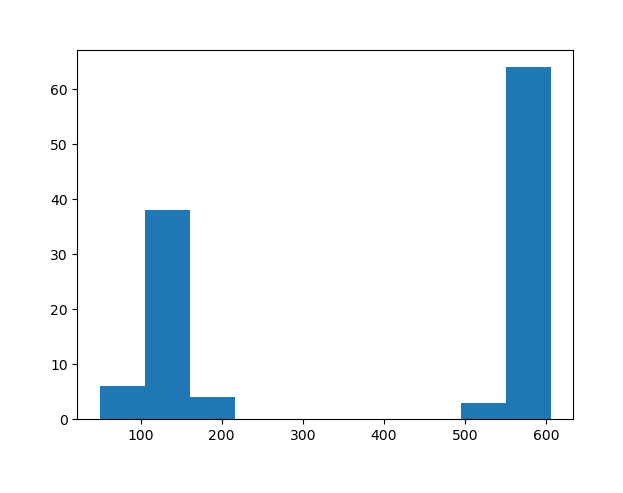

In [51]:
print(len(allLengths))
plt.hist(allLengths)

## Start Looking for Pseudogenes

In [5]:
import os
import ast
sampleCoordinates ={}
for file in os.listdir('/home/mark/Desktop/HLA/HengLi/Runs/'):
    sampleCoordinates[str(file.split(".")[0])+".hap"+str(file.split(".")[1])]={}
    tempDF = pd.read_csv('/home/mark/Desktop/HLA/HengLi/Runs/'+str(file),sep='\t', comment='#', header=None)
    tempDF2 = tempDF[tempDF[2]=='gene'].copy()
    for row in tempDF2.index:
        geneName = ast.literal_eval(tempDF2.at[row,8].split("gene_name")[1].split(";")[0])
        coordinates = str(tempDF2.at[row,3])+"-"+str(tempDF2.at[row,4])
        sampleCoordinates[str(file.split(".")[0])+".hap"+str(file.split(".")[1])][coordinates]=geneName

In [6]:
print(len(sampleCoordinates.keys()))

131


In [7]:
sampleCoordinates['HG03683.hap1']

{'1565941-1569475': 'HLA-F',
 '1634432-1636334': 'HLA-V',
 '1642533-1645463': 'HLA-P',
 '1670123-1673260': 'HLA-G',
 '1723835-1727326': 'HLA-H',
 '1732238-1734723': 'HLA-T',
 '1762386-1765942': 'HLA-K',
 '1768523-1769108': 'HLA-U',
 '1776605-1780122': 'HLA-A',
 '1790480-1793420': 'HLA-W',
 '1840639-1844182': 'HLA-J',
 '2094776-2098541': 'HLA-L',
 '2186598-2187232': 'HLA-N',
 '2327068-2330889': 'HLA-E',
 '3105820-3110123': 'HLA-C',
 '3190196-3194280': 'HLA-B',
 '3218624-3219497': 'HLA-S',
 '3239916-3252067': 'MICA',
 '3335068-3346821': 'MICB',
 '3819031-3839654': 'C4AL',
 '3851769-3872392': 'C4BL',
 '3884507-3905130': 'C4BL',
 '4309042-4314752': 'HLA-DRA',
 '4405018-4420485': 'HLA-DRB4',
 '4534549-4550668': 'HLA-DRB1',
 '4600644-4607046': 'HLA-DQA1',
 '4620872-4627997': 'HLA-DQB1',
 '4706130-4711984': 'HLA-DQA2',
 '4721019-4728384': 'HLA-DQB2',
 '4776242-4781027': 'HLA-DOB',
 '4791996-4802609': 'TAP2',
 '4808540-4817809': 'TAP1',
 '4897923-4904662': 'HLA-DMB',
 '4911908-4916920': 'HLA-D

In [8]:
geneCountDF = pd.read_csv("/home/mark/Desktop/HLA/allGeneLocations/HLA_300Gene_locationDataframe_ReWork2024.csv").set_index("Unnamed: 0")

In [9]:
geneCountDF

,C6orf136,NKAPL,BRD2,POU5F1,MIR6833,TCF19,LTA,LOC105375018,GABBR1,OR2J1,...,MIR1275,MUC22,ABCF1,HLA-B,DHX16,CYP21A2,LINC02569,SYNGAP1-AS1,PHF1,LY6G6F
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
HG00512_hap1,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...",...,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 2, 'AdditionalCopies': {0: {'Rows': ...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy..."
HG02282_hap2,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...",...,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 2, 'AdditionalCopies': {0: {'Rows': ...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy..."
HG01573_hap2,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...",...,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 3, 'AdditionalCopies': {0: {'Rows': ...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy..."
HG00514_hap1,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...",...,"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Count': 1, 'AdditionalCopies': {}, 'BestCopy...","{'Cou

In [10]:
geneCountDF.at['HG01352_hap2','HLA-DRB6']

"{'Count': 1, 'AdditionalCopies': {}, 'BestCopy': [[154723, 5.3, 0.0, 0.0, 'HG01352.hap2', 4429110, 4429469, 1, 'HLA-DRB6-202_lncR_EXON_6', 0, 360, 1, 'HLA-DRB6-202', 0.9972222222222222, 'Not Gene', 'HLA-DRB6'], [154724, 0.0, 0.0, 0.0, 'HG01352.hap2', 4429772, 4429820, 1, 'HLA-DRB6-202_lncR_IN-25_EXON_5', 0, 49, 1, 'HLA-DRB6-202', 0.979591836734694, 'Gene', 'HLA-DRB6'], [154725, 1.8, 0.0, 0.0, 'HG01352.hap2', 4430256, 4430366, 1, 'HLA-DRB6-202_lncR_EXON_4', 0, 111, 1, 'HLA-DRB6-202', 0.990990990990991, 'Gene', 'HLA-DRB6'], [154726, 2.1, 0.0, 0.0, 'HG01352.hap2', 4431069, 4431348, 1, 'HLA-DRB6-202_lncR_EXON_3', 0, 282, 3, 'HLA-DRB6-202', 0.9893617021276596, 'Gene', 'HLA-DRB6'], [154728, 3.7, 0.4, 0.0, 'HG01352.hap2', 4434292, 4434561, 1, 'HLA-DRB6-202_lncR_EXON_2', 0, 271, 1, 'HLA-DRB6-202', 0.996309963099631, 'Gene', 'HLA-DRB6'], [154729, 1.1, 1.1, 0.0, 'HG01352.hap2', 4436186, 4436370, 1, 'HLA-DRB6-202_lncR_EXON_1', 0, 187, 1, 'HLA-DRB6-202', 0.9946524064171124, 'Gene', 'HLA-DRB6'], [

In [11]:
geneCountDF.at['NA18939_hap1','HLA-DRB9']

"{'Count': 0, 'AdditionalCopies': {}, 'BestCopy': [], 'BestCopyDivergence': 0}"

In [12]:
#DRB7 = 5 exons
#DRB6 = 6 exons
#DRB2 = 4 exons
#DRB8 = 4 exons
#DRB9 = 2 exons
drbList =['HLA-DRB2', 'HLA-DRB6', 'HLA-DRB7', 'HLA-DRB8', 'HLA-DRB9']

In [13]:
pseudoDict={}

for row in geneCountDF.index:
    print(row)
    pseudoDict[row]={}
    haplotype = str(row).replace("_",'.')
    
    for drb in drbList:
        
        tempDict = ast.literal_eval(geneCountDF.at[row, drb])
        
        if tempDict['Count']>0:
            
            if tempDict['Count'] == 1:
                
                #Look at the best copy only
                tempList=[]
                for x in ast.literal_eval(geneCountDF.at[row, drb])['BestCopy']:
                    tempList.append(x)
                    
                tempDF = pd.DataFrame(data=tempList)
                tempDF[5] = tempDF[5].astype(int)
                tempDF[6] = tempDF[6].astype(int)
                
                di={0:'+', 1:'C'}
                tempDF2 = tempDF.sort_values(by=5).copy()
                tempDF2.replace({7: di}, inplace=True)
                
                tempList2 = []
                for rowy in tempDF2.index:
                    tempList2.append([rowx for rowx in tempDF2.loc[rowy]])
                
                count = len(tempDF2)
                start = min(tempDF2[5])
                end =  max(tempDF2[6])
                
                totalFlags=0
                
                for x,y in zip(tempDF2[5], tempDF2[6]):
                    print(x,y)
                    
                    flag =0
                    for gene in sampleCoordinates[haplotype]:
                        genestart= int(gene.split("-")[0])
                        geneend= int(gene.split("-")[1])
                        
                        if x > geneend or y < genestart:
                            continue
                        else:
                            if (x>=genestart and x<=geneend) or (y>=genestart and y<=geneend):
                                flag+=1
                            else:
                                continue
                        
                    if flag>0:
                        totalFlags+=1
                    else:
                        continue
                        
                
                pseudoDict[row][drb]={'Designation':'Best_Copy', 'Start':start, 'End':end, 'Flag_Percentage':totalFlags/count, 'Best_Copy_Exons':tempList2}
                
                
            else:
                
                #Look at the best copy First
                tempList=[]
                for x in ast.literal_eval(geneCountDF.at[row, drb])['BestCopy']:
                    tempList.append(x)
                    
                tempDF = pd.DataFrame(data=tempList)
                tempDF[5] = tempDF[5].astype(int)
                tempDF[6] = tempDF[6].astype(int)
                
                di={0:'+', 1:'C'}
                tempDF2 = tempDF.sort_values(by=5).copy()
                tempDF2.replace({7: di}, inplace=True)
                
                tempList2 = []
                for rowy in tempDF2.index:
                    tempList2.append([rowx for rowx in tempDF2.loc[rowy]])

                count = len(tempDF2)
                start = int(min(tempDF2[5]))
                end =  int(max(tempDF2[6]))
                
                totalFlags=0
                for x,y in zip(tempDF2[5], tempDF2[6]):
                    print(x,y)
                    
                    flag =0
                    for gene in sampleCoordinates[haplotype]:
                        genestart= int(gene.split("-")[0])
                        geneend= int(gene.split("-")[1])
                        
                        if x > geneend or y < genestart:
                            continue
                        else:
                            if (x>=genestart and x<=geneend) or (y>=genestart and y<=geneend):
                                flag+=1
                            else:
                                continue
                        
                    if flag>0:
                        totalFlags+=1
                    else:
                        continue
                        
                
                pseudoDict[row][drb]={'Designation':'Best_Copy', 'Start':start, 'End':end, 'Flag_Percentage':totalFlags/count, 'Best_Copy_Exons':tempList2}
                            
            
        else:
            pseudoDict[row][drb]='Not_Present'

HG00512_hap1
4315085 4315129
4315582 4315690
4316394 4316675
4327162 4327261
4314271 4314310
4315085 4315129
4315582 4315690
4316394 4316675
4281494 4281760
4295101 4295176
HG02282_hap2
4392244 4392292
4392744 4392854
4393604 4393865
4406927 4407032
4353858 4353897
4354672 4354720
4355169 4355277
4355963 4356244
4321095 4321361
4334702 4334777
HG01573_hap2
4403321 4403368
4403819 4403927
4404634 4404915
4417484 4417583
4487240 4487290
4488039 4488149
4488852 4489135
4497230 4497493
4506323 4506422
4449304 4449343
4449938 4449986
4450751 4450861
4451560 4451841
4326656 4326922
4340237 4340311
4352548 4352623
4383541 4383615
HG00514_hap1
4347395 4347439
4347892 4348000
4348704 4348985
4359472 4359571
4346581 4346620
4347395 4347439
4347892 4348000
4348704 4348985
4313803 4314069
4327411 4327486
HG02018_hap1
4382514 4382562
4383014 4383124
4383847 4384108
4396833 4396938
4344127 4344166
4344941 4344989
4345438 4345546
4346233 4346514
4311365 4311631
4324972 4325047
HG03456_hap2
4445090 44

4398031 4398078
4398529 4398637
4399344 4399625
4412196 4412295
4481953 4482003
4482752 4482862
4483565 4483848
4491943 4492206
4501031 4501130
4444010 4444049
4444644 4444692
4445457 4445567
4446266 4446547
4321361 4321627
4334942 4335016
4347258 4347333
4378251 4378325
HG01505_hap1
4394114 4394161
4394612 4394720
4395427 4395708
4408276 4408375
4478109 4478159
4478908 4479018
4479721 4480004
4488098 4488361
4497171 4497270
4440104 4440143
4440739 4440787
4441552 4441662
4442361 4442642
4317124 4317390
4330706 4330780
4343011 4343086
4374010 4374084
HG02953_hap1
4407599 4407647
4408099 4408209
4408959 4409220
4421943 4422048
4369223 4369262
4370037 4370085
4370534 4370642
4371328 4371609
4332803 4333069
4346427 4346501
4358712 4358786
HG00732_hap2
4365605 4365653
4366105 4366215
4366938 4367199
4379924 4380029
4327223 4327262
4328037 4328085
4328534 4328642
4329329 4329610
4294461 4294727
4308068 4308143
NA19650_hap2
4369219 4369263
4369716 4369824
4370528 4370809
4381311 4381410
4368

4347048 4347087
4347862 4347910
4348359 4348467
4349154 4349435
4314286 4314552
4327893 4327968
NA19983_hap2
4434008 4434049
4434519 4434629
4435331 4435607
4443384 4443483
4406836 4407195
4407498 4407546
4407982 4408092
4408795 4409074
4412015 4412284
4413909 4414093
4421163 4421341
4433172 4433211
4434008 4434058
4434519 4434629
4435331 4435607
4327497 4327763
4341106 4341181
4353406 4353481
4384375 4384449
HG01352_hap1
4382182 4382229
4382680 4382788
4383495 4383776
4396344 4396443
4466049 4466099
4466848 4466958
4467661 4467944
4476039 4476302
4485131 4485230
4428161 4428200
4428795 4428843
4429608 4429718
4430417 4430698
4305510 4305776
4319091 4319165
4331402 4331477
4362399 4362473
HG02666_hap1
4412018 4412066
4412518 4412628
4413351 4413612
4426343 4426448
4373307 4373346
4374121 4374169
4374618 4374728
4375413 4375694
4336845 4337111
4350471 4350545
4362756 4362830
HG02011_hap1
4451551 4451598
4452049 4452157
4452864 4453145
4465716 4465815
4535425 4535475
4536224 4536334
4537

In [15]:
pseudoDict['HG01352_hap2']

{'HLA-DRB2': {'Designation': 'Best_Copy',
  'Start': 4456293,
  'End': 4465768,
  'Flag_Percentage': 1.0,
  'Best_Copy_Exons': [[143799,
    4.8,
    0.0,
    0.0,
    'HG01352.hap2',
    4456293,
    4456334,
    'C',
    'HLA-DRB2-201_UP_IN-25_EXON_4',
    0,
    49,
    8,
    'HLA-DRB2-201',
    0.8367346938775511,
    'Not Gene',
    'HLA-DRB2'],
   [143800,
    2.7,
    0.0,
    0.0,
    'HG01352.hap2',
    4456804,
    4456914,
    'C',
    'HLA-DRB2-201_UP_EXON_3',
    0,
    111,
    1,
    'HLA-DRB2-201',
    0.990990990990991,
    'Gene',
    'HLA-DRB2'],
   [143801,
    7.4,
    0.0,
    7.8,
    'HG01352.hap2',
    4457616,
    4457892,
    'C',
    'HLA-DRB2-201_UP_EXON_2',
    0,
    262,
    6,
    'HLA-DRB2-201',
    0.9770992366412212,
    'Not Gene',
    'HLA-DRB2'],
   [143802,
    10.0,
    4.0,
    0.0,
    'HG01352.hap2',
    4465669,
    4465768,
    'C',
    'HLA-DRB2-201_UP_EXON_1',
    2,
    104,
    1,
    'HLA-DRB2-201',
    0.9716981132075472,
    'Not Ge

In [14]:
pseudoDict['HG02554_hap1']

{'HLA-DRB2': {'Designation': 'Best_Copy',
  'Start': 4442637,
  'End': 4452128,
  'Flag_Percentage': 1.0,
  'Best_Copy_Exons': [[172694,
    6.2,
    0.0,
    0.0,
    'HG02554.hap1',
    4442637,
    4442684,
    'C',
    'HLA-DRB2-201_UP_IN-25_EXON_4',
    0,
    49,
    2,
    'HLA-DRB2-201',
    0.9591836734693876,
    'Not Gene',
    'HLA-DRB2'],
   [172695,
    3.6,
    0.0,
    0.0,
    'HG02554.hap1',
    4443136,
    4443246,
    'C',
    'HLA-DRB2-201_UP_EXON_3',
    0,
    111,
    1,
    'HLA-DRB2-201',
    0.990990990990991,
    'Gene',
    'HLA-DRB2'],
   [172696,
    8.4,
    0.0,
    7.6,
    'HG02554.hap1',
    4443947,
    4444228,
    'C',
    'HLA-DRB2-201_UP_EXON_2',
    0,
    262,
    1,
    'HLA-DRB2-201',
    0.9961832061068704,
    'Not Gene',
    'HLA-DRB2'],
   [172697,
    11.0,
    4.0,
    0.0,
    'HG02554.hap1',
    4452029,
    4452128,
    'C',
    'HLA-DRB2-201_UP_EXON_1',
    2,
    104,
    1,
    'HLA-DRB2-201',
    0.9716981132075472,
    'Not Ge

In [12]:
#Run Twice to fill out the heatmap
immunoPseudo=[]
mp = []
for haplotype in pseudoDict.keys():
    tempList=[]
    for drb in pseudoDict[haplotype]:
        if pseudoDict[haplotype][drb]=='Not_Present':
            continue
        else:
            if float(pseudoDict[haplotype][drb]['Flag_Percentage'])==0.0:
                tempList.append(drb)
            else:
                continue
    
    hap = haplotype.replace("_",".")
    tempDF = DRB_DF[DRB_DF[5]==hap].copy()
    mp.append('_'.join(tempList))
    newList =[ast.literal_eval(x) for x in set(tempDF[tempDF[10].str.contains('HLA', regex=True)][18])]
    immunoPseudo.append('_'.join(newList))
    heatmap.at['_'.join(tempList), '_'.join(newList)]+=1
    if '_'.join(newList) == 'HLA-DRB1_HLA-DRB5' and '_'.join(tempList) == 'HLA-DRB6_HLA-DRB9':
        print(haplotype)
    else:
        pass
    print(haplotype, 'Missing Pseudogene: '+str(tempList), '\n','ImmunoAnnot: '+str(set(tempDF[tempDF[10].str.contains('HLA', regex=True)][18])),'\n')

NameError: name 'DRB_DF' is not defined

In [174]:
heatmap = pd.DataFrame(index=[x for x in set(mp)], columns=[y for y in set(immunoPseudo)]).fillna(0)
heatmap

,HLA-DRB1_HLA-DRB3,HLA-DRB1_HLA-DRB4,HLA-DRB1_HLA-DRB5,HLA-DRB1
HLA-DRB2_HLA-DRB6_HLA-DRB9,0,0,0,0
HLA-DRB7_HLA-DRB8_HLA-DRB9,0,0,0,0
HLA-DRB6_HLA-DRB9,0,0,0,0
HLA-DRB2_HLA-DRB9,0,0,0,0
HLA-DRB9,0,0,0,0


<Axes: >

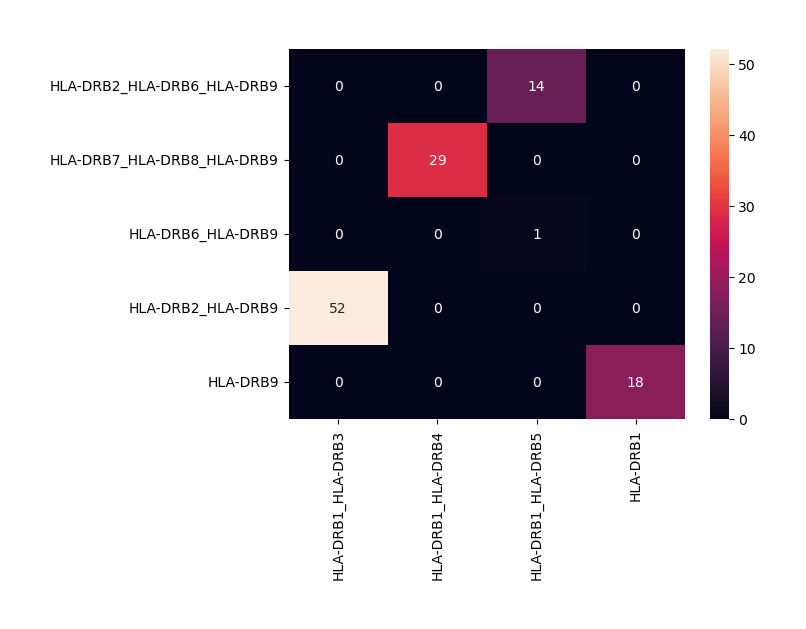

In [176]:
import seaborn as sns

sns.heatmap(data=heatmap, annot=True)

In [181]:
pseudoDict

{'HG02282_hap2': {'HLA-DRB2': {'Designation': 'Best_Copy',
   'Start': 4392244,
   'End': 4407032,
   'Flag_Percentage': 0.0,
   'Best_Copy_Exons': [[100729,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4392244,
     4392292,
     'C',
     'HLA-DRB2-201_UP_IN-25_EXON_4',
     0,
     49,
     1,
     'HLA-DRB2-201',
     0.979591836734694,
     'Gene',
     'HLA-DRB2'],
    [100730,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4392744,
     4392854,
     'C',
     'HLA-DRB2-201_UP_EXON_3',
     0,
     111,
     1,
     'HLA-DRB2-201',
     0.990990990990991,
     'Gene',
     'HLA-DRB2'],
    [100731,
     0.0,
     0.0,
     0.0,
     'HG02282.hap2',
     4393604,
     4393865,
     'C',
     'HLA-DRB2-201_UP_EXON_2',
     0,
     262,
     1,
     'HLA-DRB2-201',
     0.9961832061068704,
     'Gene',
     'HLA-DRB2'],
    [100732,
     14.6,
     0.0,
     0.0,
     'HG02282.hap2',
     4394376,
     4394416,
     'C',
     'HLA-DRB2-201_UP_EXON_2',
     0,
  

In [270]:
pseudoDict['NA18534_hap1']['HLA-DRB9']

{'Designation': 'Best_Copy',
 'Start': 4331442,
 'End': 4388403,
 'Flag_Percentage': 0.0,
 'Best_Copy_Exons': [[31990,
   0.8,
   0.0,
   0.0,
   'NA18534.hap1',
   4331442,
   4331708,
   'C',
   'HLA-DRB9-201_UP_EXON_2',
   0,
   267,
   1,
   'HLA-DRB9-201',
   0.99625468164794,
   'Gene',
   'HLA-DRB9'],
  [31991,
   2.7,
   0.0,
   0.0,
   'NA18534.hap1',
   4345023,
   4345097,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Gene',
   'HLA-DRB9'],
  [31992,
   2.6,
   0.0,
   0.0,
   'NA18534.hap1',
   4357334,
   4357409,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   0,
   76,
   1,
   'HLA-DRB9-201',
   0.986842105263158,
   'Gene',
   'HLA-DRB9'],
  [31993,
   8.0,
   0.0,
   0.0,
   'NA18534.hap1',
   4388329,
   4388403,
   'C',
   'HLA-DRB9-201_UP_EXON_1',
   1,
   75,
   1,
   'HLA-DRB9-201',
   0.9736842105263158,
   'Not Gene',
   'HLA-DRB9']]}

In [186]:
PseudoList=[]
for haplotype in pseudoDict.keys():
    for drb in pseudoDict[haplotype]:
        if pseudoDict[haplotype][drb] == 'Not_Present':
            continue
        else:
            if float(pseudoDict[haplotype][drb]['Flag_Percentage']) == 0.0:
                for exon in pseudoDict[haplotype][drb]['Best_Copy_Exons']:
                    PseudoList.append(exon)
            else:
                continue

In [188]:
pDF = pd.DataFrame(data=PseudoList)

In [83]:
pDF[pDF['4']=='NA18939.hap2']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [190]:
#pDF.to_csv('/home/mark/Desktop/HLA/DRB/DRB_PseudoGene_RM.csv')